<a href="https://colab.research.google.com/github/Nunzio03/follow-me-drone-notebooks/blob/master/tuningDataPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
#!git clone https://github.com/Nunzio03/follow-me-drone-notebooks
!pwd



/content


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

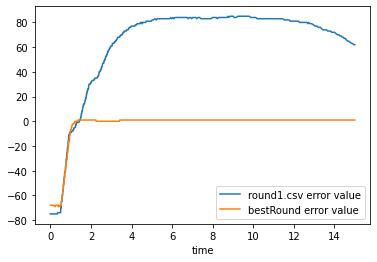

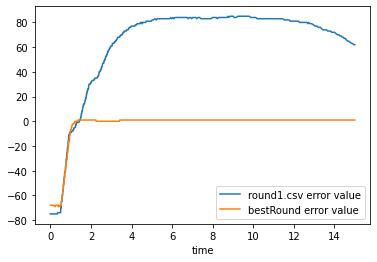

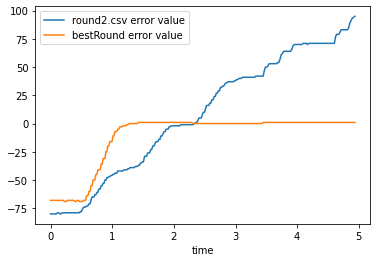

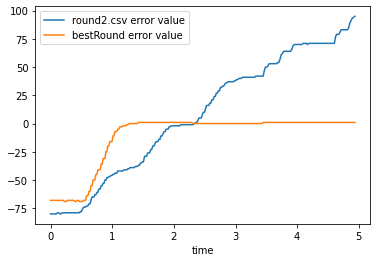

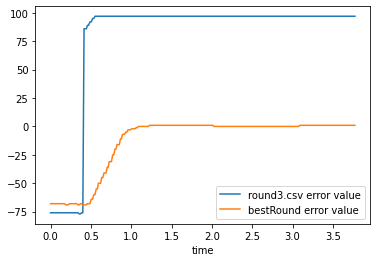

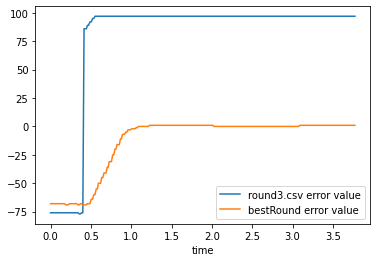

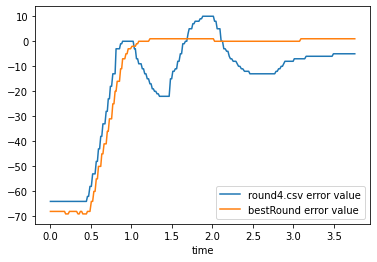

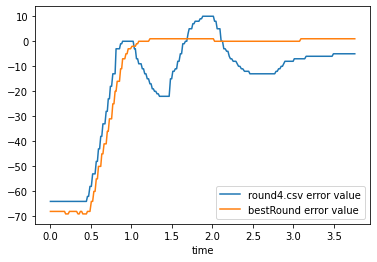

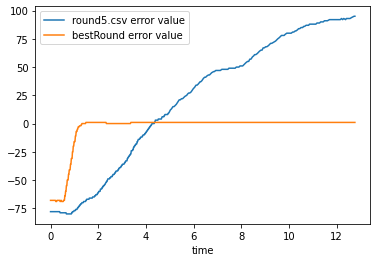

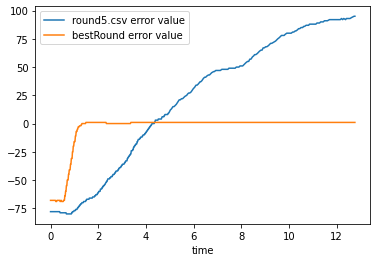

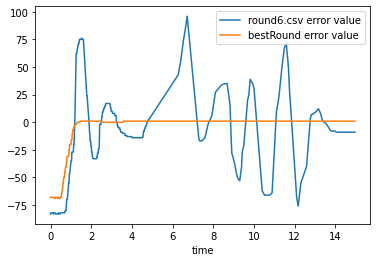

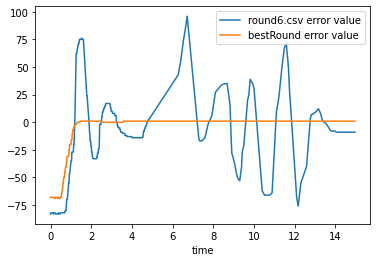

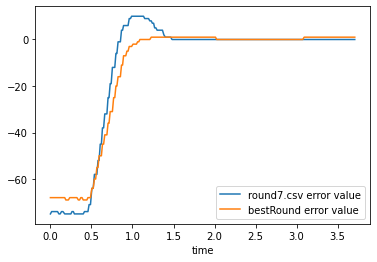

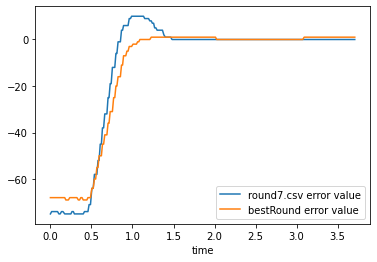

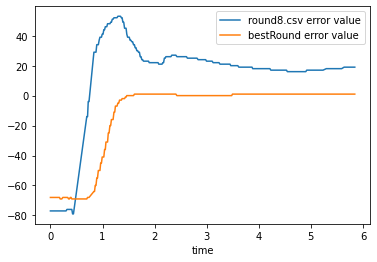

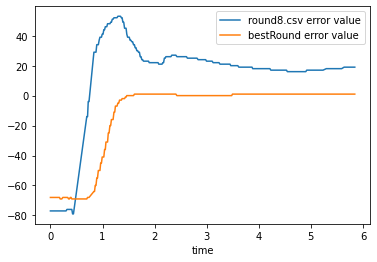

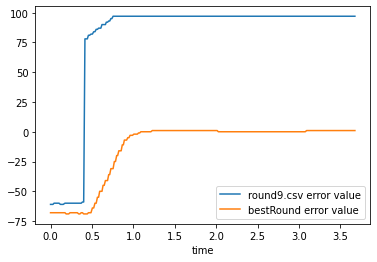

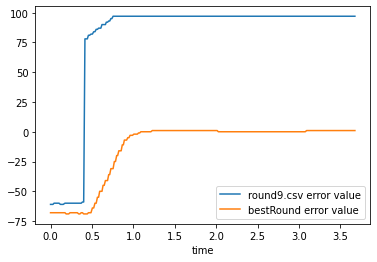

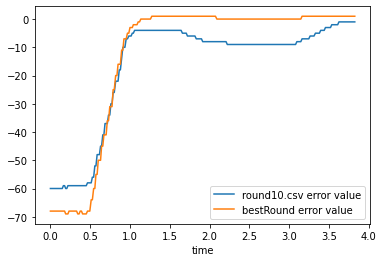

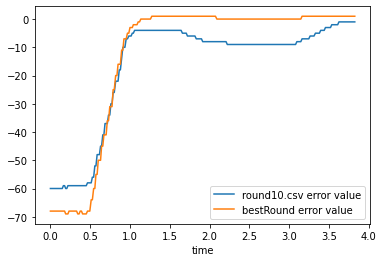

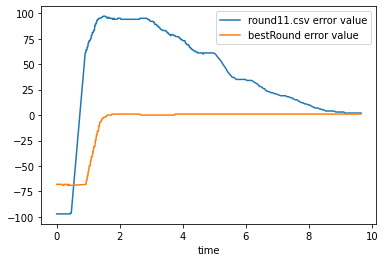

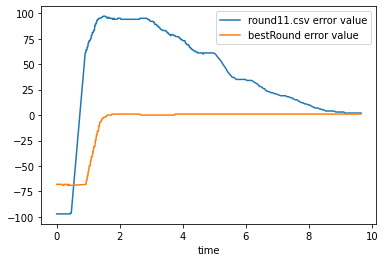

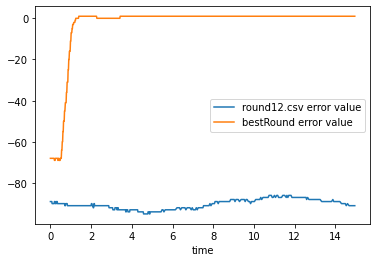

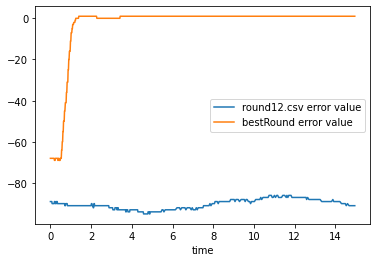

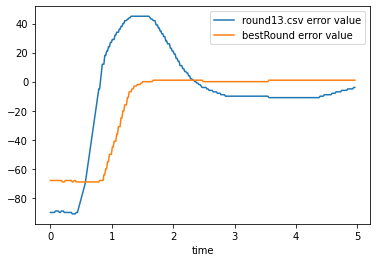

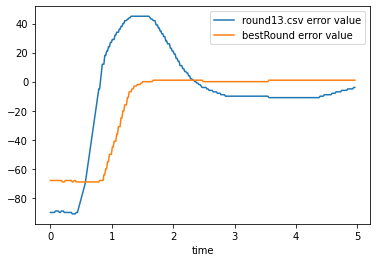

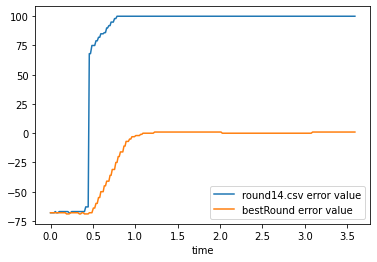

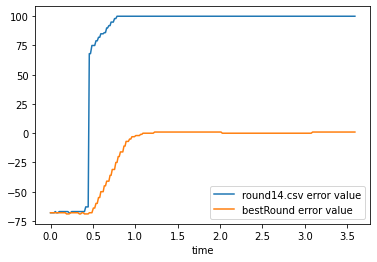

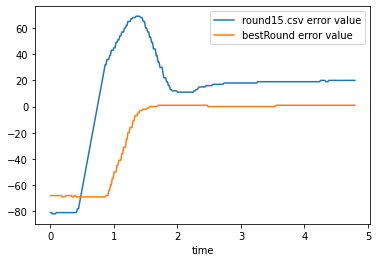

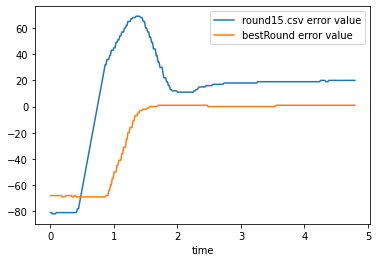

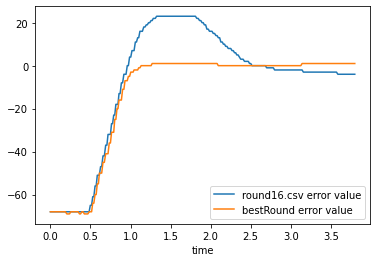

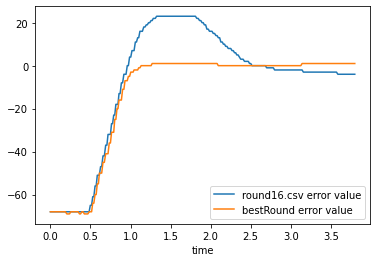

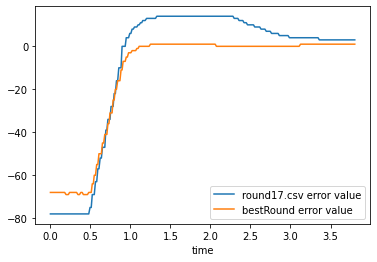

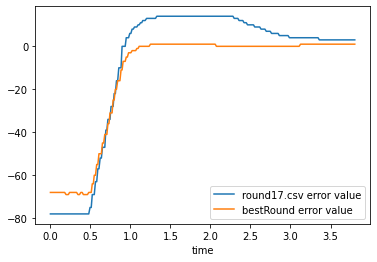

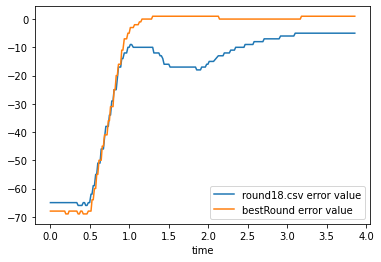

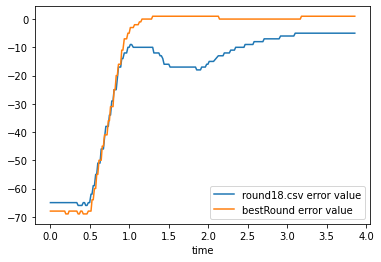

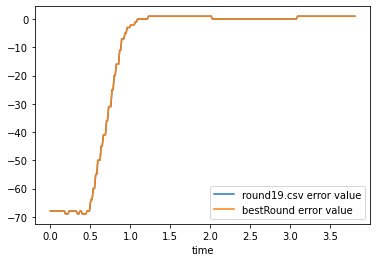

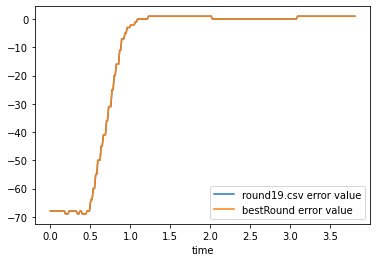

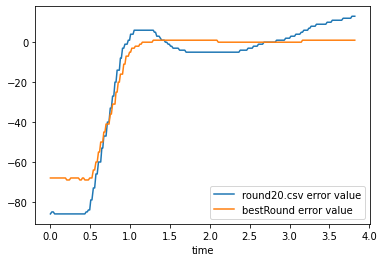

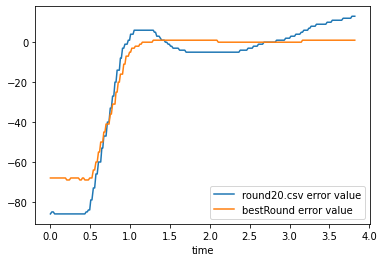

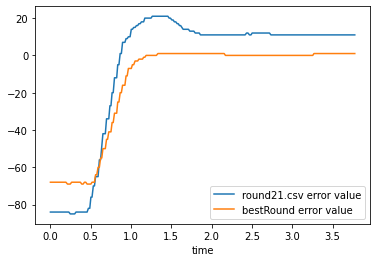

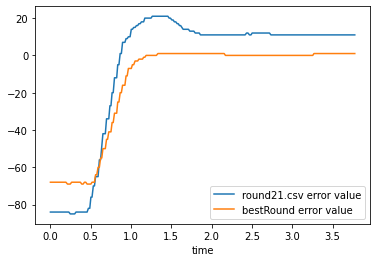

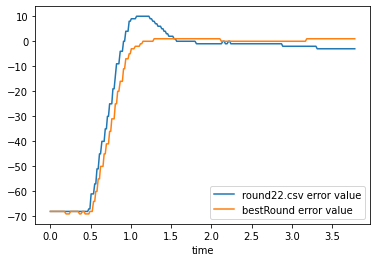

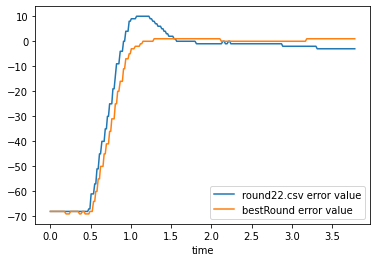

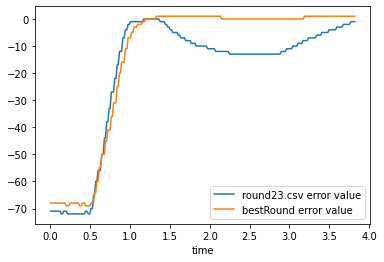

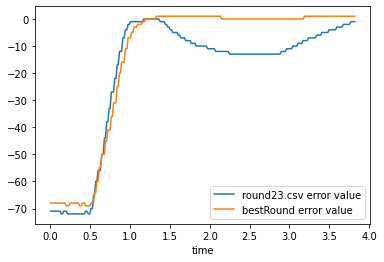

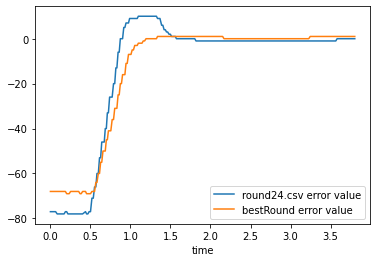

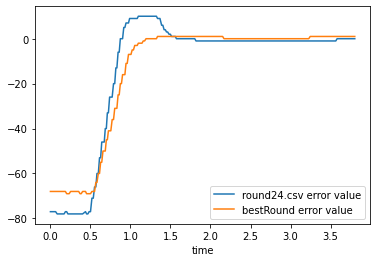

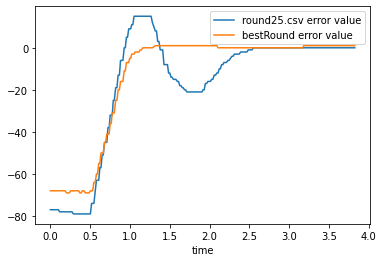

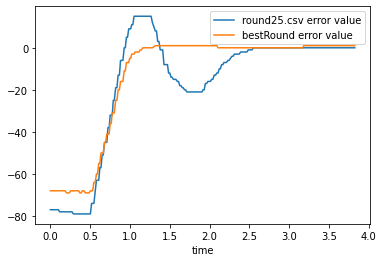

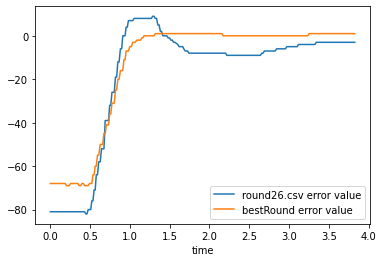

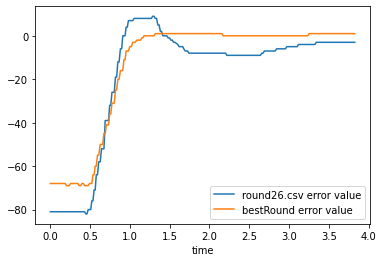

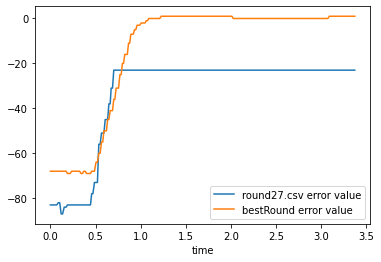

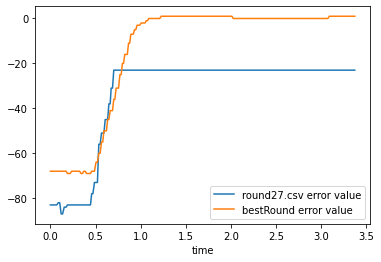

In [24]:
os.chdir("/content/follow-me-drone-notebooks/tuning_pid/x_axis")

bestRound = pd.read_csv("round19.csv", skiprows=2 , sep=';', header = None, names = ["time", "value"])
for i in range(1,28):
  currentplotname = "round"+str(i)+".csv"
  currentRound = pd.read_csv(currentplotname, skiprows=2 , sep=';', header = None, names = ["time", "value"])
  bestRound.drop(bestRound.tail(1).index,inplace=True)
  currentRound.drop(currentRound.tail(1).index,inplace=True)
  comparison = pd.DataFrame()
  
  if currentRound.size > bestRound.size:
    comparison['time'] = currentRound['time']
  else:
    comparison['time'] = bestRound['time']


  
  comparison[currentplotname+' error value'] = currentRound['value']
  comparison['bestRound error value'] = bestRound['value']
  comparison[currentplotname+' error value'].fillna(float(currentRound.tail(1)['value']), inplace = True)
  comparison['bestRound error value'].fillna(float(bestRound.tail(1)['value']), inplace = True)
  comparison['time'] = comparison['time'].astype(float)
  comparison['time']= comparison['time']-comparison['time'][0]
  comparison.plot(x ='time')
  plot = comparison.plot(x='time')
  fig = plot.get_figure()
  fig.savefig("comparison"+str(i)+".png")

No handles with labels found to put in legend.


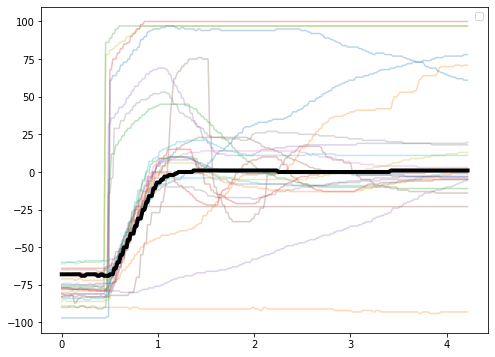

In [25]:
bestRound = pd.read_csv("round19.csv", skiprows=2 , sep=';', header = None, names = ["time", "value"])
bestRound.drop(bestRound.tail(1).index,inplace=True)
comparison = pd.DataFrame()
comparison['time'] = bestRound['time']
comparison['bestRound error value'] = bestRound['value']

for i in range(1,28):
  currentplotname = "round"+str(i)
  currentRound = pd.read_csv(currentplotname+".csv", skiprows=2 , sep=';', header = None, names = ["time", "value"])
  currentRound.drop(currentRound.tail(1).index,inplace=True)
  
  if currentRound.size > comparison.size:
    comparison['time'] = currentRound['time']

  comparison[currentplotname+' error value'] = currentRound['value']

for i in range(1,28):
  currentplotname = "round"+str(i)
  currentRound = pd.read_csv(currentplotname+".csv", skiprows=2 , sep=';', header = None, names = ["time", "value"])
  currentRound.drop(currentRound.tail(1).index,inplace=True)
  comparison[currentplotname+' error value'].fillna(float(currentRound.tail(1)['value']), inplace = True)


comparison['bestRound error value'].fillna(float(bestRound.tail(1)['value']), inplace = True)

comparison['time'] = comparison['time'].astype(float)
comparison['time']= comparison['time']-comparison['time'][0]

fig, ax = plt.subplots(figsize=(8, 6))
a = 1/(28*1.1)
bestindex = 19
for i in range(1,28):
  currentplotname = "round"+str(i)
  if i != bestindex:
    plt.plot(comparison['time'], comparison[currentplotname+' error value'], alpha=0.3)
 
plt.plot(comparison['time'], comparison["round"+str(bestindex)+' error value'], color=(0,0,0,1), linewidth=4)

plt.legend(loc='best')

plt.savefig("total.png")


In [3]:
PID_fitness = pd.read_csv("plot.csv", sep=',', header = None, names = ["P", "I","D","fitness"]).astype(float)


ValueError: ignored